## Machine Learning - Data Fundamentals Final Project
---
#### By Matt Hanson 


[Follow along on Github](https://github.com/matthewellishanson/datafun-07-ml)


In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

### Part 1 - Chart a Straight Line

In this section, we will chart a straight line showing a simple linear regression between Fahrenheit temperatures and Month-Year from the dataset `data/ave_hi_nyc_jan_1895-2018.csv`.

Steps:
1. Load the dataset.
2. Extract the relevant columns (Month-Year and Fahrenheit temperatures).
3. Perform a simple linear regression.
4. Plot the regression line along with the data points.


#### Setting up temps dataframe, relationship between Farenheit and Celsius temperatures

In [9]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [11]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [12]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

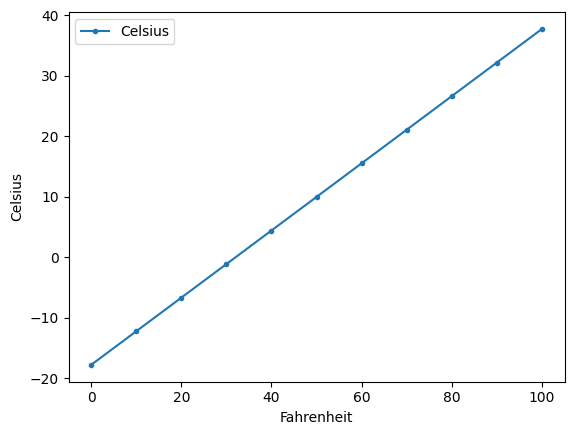

In [13]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

In [17]:
# import and preview NYC temperature data
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [18]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Cleaning the Data

In [19]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [22]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [21]:
nyc.Date.dtype
nyc.Date = nyc.Date.floordiv(100)

In [23]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Calculating Basic Descriptive Stats

In [25]:
pd.options.display.precision = 2

In [26]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### Forecasting Future January Average Highs

In [27]:
from scipy import stats

In [28]:
# set up linear regression, get slope
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [29]:
# get y-intercept
linear_regression.intercept

np.float64(8.694993233674289)

In [30]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [31]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

#### Plotting the Average High Temperatures and a Regression Line

In [32]:
sns.set_style('whitegrid')

(10.0, 70.0)

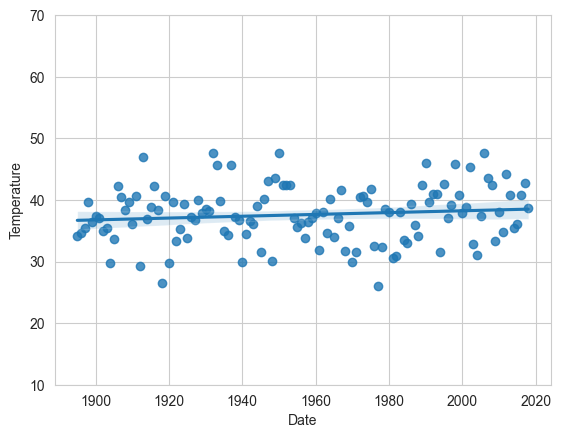

In [33]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)